<a href="https://colab.research.google.com/github/juliocnsouzadev/deep-learning/blob/medical-coast-personal/Medical_Cost_Personal_Tensorflow_Model_with_OneHot_encoding_using_Sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Medical Cost Personal Dataset ⚕ 💰
https://www.kaggle.com/datasets/mirichoi0218/insurance

In [1]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder 
from sklearn.model_selection import train_test_split

### Reading Data 👓

In [2]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


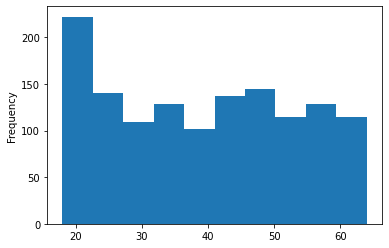

In [4]:
insurance["age"].plot.hist()

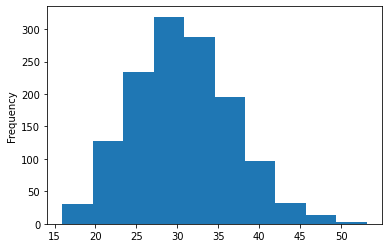

In [5]:
insurance["bmi"].plot.hist()

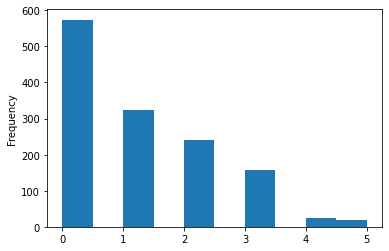

In [6]:
insurance["children"].plot.hist()

### Creating Features and Labels 🏷

In [7]:
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

In [8]:
X.head()

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest


In [9]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

### Creating training and test sets 🧪

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

### Normalisation

In [11]:
# Create a column tranformer

c_tranformer = make_column_transformer(
    # converting values into between 0 and 1
    (MinMaxScaler(), ["age", "bmi", "children"]), 
    
    # onehot enconding -> categorical colums, create a column for each category with value 0 or 1 (exist/not)
    (OneHotEncoder(handle_unknown="ignore"),["sex", "smoker", "region"]) 
)

# Fit the column transformer to our training data
c_tranformer.fit(X_train)

# Transform training and test data with normalization (MinMaxScaler) and OneHotEncoder
X_train_normal = c_tranformer.transform(X_train)
X_test_normal = c_tranformer.transform(X_test)
     

In [12]:
pd.DataFrame(X_train_normal).loc[0]

0     0.608696
1     0.107345
2     0.400000
3     1.000000
4     0.000000
5     1.000000
6     0.000000
7     0.000000
8     1.000000
9     0.000000
10    0.000000
Name: 0, dtype: float64

### Creating a Tensorflow Model ⭐

In [17]:
tf.random.set_seed(42)

deep_learning_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, name="input_layer-01-100"),
    tf.keras.layers.Dense(10, name="input_layer02-10"),
    tf.keras.layers.Dense(1, name="output_layer")
], 
name = "insurance-model-deep-learning-01")

deep_learning_model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["mae"]
)

history = deep_learning_model.fit(X_train_normal, y_train, epochs= 150, verbose= 0)

### Evaluating the Model 📐

In [18]:
deep_learning_model.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3287.1189 - mae: 3287.1189


[3287.118896484375, 3287.118896484375]

Text(0.5, 0, 'epochs')

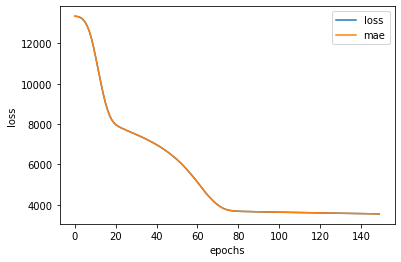

In [19]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

### Making Predictions 🌐

In [21]:
y_pred = deep_learning_model.predict(X_test_normal)
y_pred[0:5]


9/9 [==============================] - 0s 4ms/step


array([[ 9351.354],
       [ 6026.316],
       [39304.402],
       [ 9260.631],
       [26990.203]], dtype=float32)

### Visualising Predictions 👀

In [22]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
    plt.figure(figsize=(10,7))
    plt.scatter(train_data, train_labels, c='b', label='Training Data')
    plt.scatter(test_data, test_labels, c='g', label='Testing Data')
    plt.scatter(test_data, predictions, c='r', label='Predictions')
    plt.legend()

In [23]:
(X_train.to_numpy()[:,0].shape, y_train.to_numpy().shape)

((1070,), (1070,))

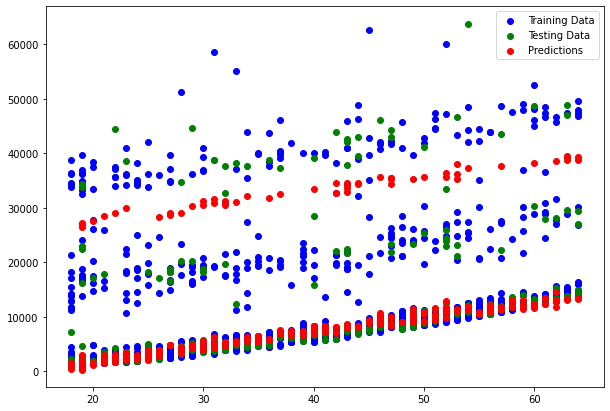

In [24]:
plot_predictions(
   X_train.to_numpy()[:,0],
   y_train.to_numpy(),
   X_test.to_numpy()[:,0],
   y_test.to_numpy(),
   y_pred
)